In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
df = pd.read_csv("bunny_fit_extra7.log",names=['k','init','model','l','i','scale'])
mdf = df.groupby(['init','model','scale','k']).mean()
sdf = df.groupby(['init','model','scale','k']).std()


/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


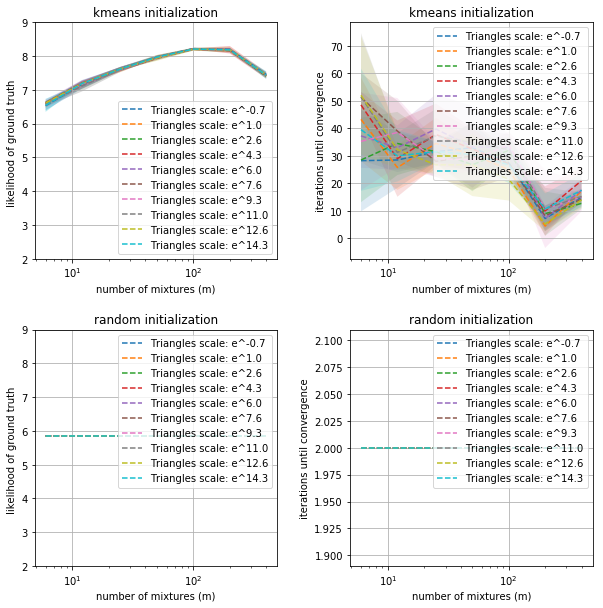

In [24]:
fig = plt.figure(figsize=(10,10))
for ii, init in enumerate(['kmeans','random']):
    for model in range(1):
        for scale in sorted(df.scale.unique()):
            ls = '--' if model < 1 else '-'
            if model == 0:
                label = 'Triangles scale: e^{0:.1f}'.format(np.log(scale))
            if model == 1:
                label = 'Center of Mass'
            if model == 2:
                label = 'Vertices'
            ldf = mdf.loc[(init,model,scale),]
            x = np.array(ldf.index)

            y = ldf.values[:,0]
            error = 2*sdf.loc[(init,model,scale),].values[:,0]

            ax = plt.subplot(2,2,1+ii*2)
            plt.plot(x,y,ls=ls,label=label)
            plt.fill_between(x, y-error, y+error,alpha=0.3)
            plt.grid(True)
            plt.xlabel('number of mixtures (m)')
            plt.title('{} initialization'.format(init))
            plt.ylabel('likelihood of ground truth ')
            plt.ylim(2,9)
            ax.set_xscale("log", nonposx='clip')

            y = ldf.values[:,1]
            error = sdf.loc[(init,model,scale),].values[:,1]

            ax = plt.subplot(2,2,2+ii*2)
            plt.plot(x,y,ls=ls,label=label)
            plt.fill_between(x, y-error, y+error,alpha=0.15)

            ax.set_xscale("log", nonposx='clip')
            plt.grid(True)
            plt.xlabel('number of mixtures (m)')
            plt.title('{} initialization'.format(init))
            plt.ylabel('iterations until convergence')
            #plt.subplot(2,2,3)
            #plt.subplot(2,2,4)
for i in range(4):
    plt.subplot(2,2,1+i)
    plt.legend()
fig.subplots_adjust(wspace=0.3,hspace=0.3)
plt.savefig('graphs7.pdf')

In [44]:
mdf.loc[('kmeans',0),].values, np.array(mdf.loc[('kmeans',0),].index)

(array([[ 6.34375799, 26.55      ],
        [ 6.80723017, 32.55      ],
        [ 7.20205797, 15.95      ],
        [ 7.51507547, 12.4       ],
        [ 7.78061717,  7.8       ],
        [ 7.80759509,  5.55      ],
        [ 7.08882075,  2.45      ],
        [ 5.50801949,  2.        ]]),
 array([  6,  12,  25,  50, 100, 200, 400, 800]))

In [86]:
df2

,k,init,model,l,i
0,6,random,2,6.310497,40
1,6,random,3,6.405751,40
2,6,random,2,6.472648,40
3,6,random,3,6.253631,40
4,6,random,2,6.300474,40
5,6,random,3,6.377232,40
6,6,random,2,6.431460,40
7,6,random,3,6.416860,40
8,6,random,2,6.464778,40
9,6,random,3,6.358286,40
